In [121]:
import numpy as np
import pandas as pd
import xgboost as xgb
import sklearn
import sklearn.tree
import sklearn.ensemble
import matplotlib.pyplot as plt
from sklearn.cross_validation import cross_val_score
from sklearn import preprocessing as pp
%matplotlib inline

In [122]:
data_train_read = pd.read_csv("train.csv")
data_test_read = pd.read_csv("test.csv")

In [123]:
data_train = data_train_read.copy()

In [124]:
data_test = data_test_read.copy()

In [135]:
X_train = data_train[data_train.columns[1:len(data_train.columns) - 1]]
y_train = data_train['TARGET']

In [47]:
clf = xgb.XGBRegressor(nthread=4, 
                       max_depth=8, 
                       n_estimators=30, 
                       subsample=0.5, 
                       learning_rate=0.006, 
                       seed=1337)

In [48]:
scores = cross_val_score(clf, X_train, y_train, scoring='roc_auc', cv=3)
print scores.mean()

0.828266253987


# xgboost classifier


In [146]:
X_train.columns = [str(i) for i in np.arange(0, len(X_train.columns))]

In [142]:
clf = xgb.XGBClassifier(max_depth=8, 
                        n_estimators=30, 
                        subsample=0.5, 
                        learning_rate=0.1, 
                        seed=1337)

In [105]:
# clf.fit(X_train.head(1000), y_train.head(1000))
# fff = clf.predict(X_train.tail(1000))-y_train.tail(1000)

In [147]:
scores = cross_val_score(clf, X_train, y_train, scoring='roc_auc', cv=3)
print scores.mean()

0.827967473914


In [148]:
X_train.shape

(76020, 306)

# deleted dup/unique w\o scale 0.834372941429
# ^ with scale 0.827967473914 -> no scaling


In [35]:
clf.fit(X_train, y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.006, max_delta_step=0, max_depth=8,
       min_child_weight=1, missing=None, n_estimators=1000, nthread=4,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=1337, silent=True, subsample=0.5)

In [36]:
X_test = data_test[data_test.columns[1:]]

In [37]:
y_test = clf.predict(X_test)

In [40]:
trash_count = 0
for i in range(len(y_test)):
    if y_test[i] < 0:
        y_test[i] = 0
        trash_count += 1
    if y_test[i] > 1:
        y_test[i] = 1
        trash_count += 1
print trash_count
ans = pd.DataFrame(index=data_test['ID'], data={'TARGET': y_test})
ans.to_csv('kek.csv')

0


# normalize

In [144]:
min_max_scaler = pp.MinMaxScaler()
X_train = pd.DataFrame(min_max_scaler.fit_transform(X_train))

In [17]:
pd.DataFrame(X_train_minmax).describe()

,0,1,2,3,4,5,6,7,8,9,...,263,264,265,266,267,268,269,270,271,272
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000
mean,0.998239,0.282129,0.000411,0.005615,0.005685,0.000432,0.000585,0.000063,0.000086,0.000384,...,0.000025,0.000159,0.000067,0.000088,0.000096,0.000072,0.000075,0.000112,0.000142,0.005087
std,0.039024,0.129565,0.007689,0.026328,0.025982,0.011308,0.013883,0.004637,0.005532,0.011565,...,0.004348,0.009117,0.005590,0.005641,0.005867,0.004593,0.005995,0.005929,0.007169,0.008292
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.999764,0.180000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002846
50%,0.999764,0.230000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004596
75%,0.999764,0.350000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005156
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [136]:
newX_train = X_train.copy()

In [137]:
# remove constant columns
colsToRemove = []
for col in newX_train.columns:
    if newX_train[col].std() == 0:
        colsToRemove.append(col)

print "constant", len(colsToRemove)

newX_train.drop(colsToRemove, axis=1, inplace=True)

constant 34


In [138]:
# remove duplicate columns
colsToRemove = []
columns = newX_train.columns
for i in range(len(columns)-1):
    v = newX_train[columns[i]].values
    for j in range(i+1,len(columns)):
        if np.array_equal(v, newX_train[columns[j]].values):
            colsToRemove.append(columns[j])
            
print "duplicate", pd.Series(colsToRemove).nunique()
newX_train.drop(colsToRemove, axis=1, inplace=True)

duplicate 29


In [139]:
X_train = newX_train

In [140]:
newX_train.describe()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04
mean,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,3.160715,...,0.186630,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05
std,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,95.268204,...,31.879418,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05
min,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03
25%,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04
50%,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05
75%,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05
max,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,8237.820000,...,7331.340000,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07


In [34]:
y_train.value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

(array([ 73012.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,   3008.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

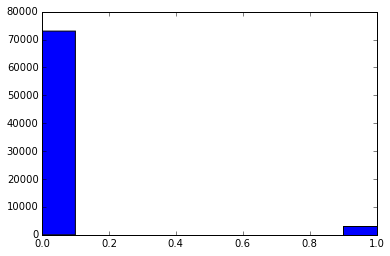

In [40]:
plt.hist(y_train)

In [76]:
notZero = data_train[data_train['TARGET']>0.]
middles = notZero[notZero['TARGET']<1.]

In [78]:
data_train['TARGET'].value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

In [77]:
len(middles)

0

(array([    0.,     0.,     0.,     0.,     0.,  3008.,     0.,     0.,
            0.,     0.]),
 array([ 0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,  1.5]),
 <a list of 10 Patch objects>)

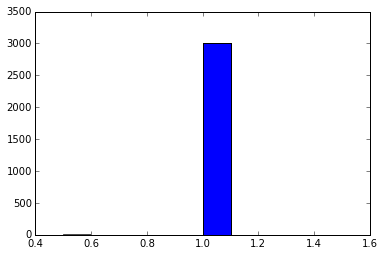

In [72]:
plt.hist(m)